# Özellik Seçimi ( Feature Selection )
* Model içim en önemli özellikleri belirleme ve geri kalanları eleme işlemidir.
* Neden önemli:
  - Modelin performansını artıtır.
  - Eğitim süresini kısaltır.
  - Aşırı öğrenmeyi ( overfitting ) azaltır.
  - Veri setinin anlaşılabilirliğini sağlar.

Özellik Seçimi ( Feature Selection ) - Varyans Eşiği ( VarianceThreshold )
* varyansı belirli bir eşiğin aktubda olan özelliğikleri kaldırır.
* sabit veya neredeeyse sabit değelere sahip özellikleri temizlemek için kullanılır.
* Varyans değeri düşük olan özellikler modelin öğrenmesine pek bir katkı sağlamaz.

Özellik Seçimi ( Feature Selection ) - Korelasyon Tabanlı Öznitelik Seçimi ( SelectKBest )
* hedef değikenle yüksek korelasyona sahip özellikleri seçer
* çoklu doğrısalık sorunun azaltmaya yardımcı olur
* özellikler arasıdnki doğrsul illiki ölçülür
* veri setindeki hedef değişken ile diğer değerlerin arasındaki korelasyon matrisi bulunur
* istenilen korelasyon değerine göre değikenler seçilir veya elenir.

Özellik Seçimi ( Feature Selection ) - SelectFromModel
* bir makine öğreniim modelinin özellik önemine göre seçilim ypar
* regresyon modellerini lasso ridge veya ağac tabanlı modeller randorm forest kullanılabilir.
* Modelin en iyi sonuç verdiği değişkenler tutulur.

Özellik Seçimi ( Feature Selection ) - Karşılaştırma
* Varyans Eşiği: Düşük varyansa sahip özelliklerri temizler.
* Koreslasyon tabanlı öznitelik seçimi hedef değilkenle yüksek korelasyona sahip değişkenler seçilir.
* SelectFromModel: Modelin özellik önemine göre seçim yapar.

In [8]:
# Gerekli Kütüphanelerin Yüklenmesi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, f_regression, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# 1. Adım: Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target
özellik_isimleri = iris.feature_names

In [3]:
# 2. Adım: Veri setini eğitim ve test kümelerine ayırma
X_eğitim, X_test, y_eğitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 3. Adım: Varyans Eşiği Uygulama (Görselleştirme dahil)
varyans_esigi = VarianceThreshold(threshold=0.1)
X_eğitim_varyans = varyans_esigi.fit_transform(X_eğitim)
X_test_varyans = varyans_esigi.transform(X_test)

secilen_varyans = varyans_esigi.get_support(indices=True)
secilen_varyans_isimler = np.array(özellik_isimleri)[secilen_varyans]

print("Varyans Eşiği ile Seçilen Özellikler:", secilen_varyans_isimler)

Varyans Eşiği ile Seçilen Özellikler: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


In [5]:
# 4. Adım: Korelasyon Tabanlı Seçim (SelectKBest)
# f_regression yöntemiyle hedef ile özellik arasındaki lineer ilişkiye bakılır
k_best = SelectKBest(score_func=f_regression, k=2)  # En iyi 2 özelliği seçiyoruz
X_eğitim_kbest = k_best.fit_transform(X_eğitim_varyans, y_eğitim)
X_test_kbest = k_best.transform(X_test_varyans)

secilen_kbest = k_best.get_support(indices=True)
secilen_kbest_isimler = secilen_varyans_isimler[secilen_kbest]

print("Korelasyon ile Seçilen Özellikler:", secilen_kbest_isimler)

Korelasyon ile Seçilen Özellikler: ['petal length (cm)' 'petal width (cm)']


In [6]:
# 5. Adım: SelectFromModel Uygulama (Görselleştirme dahil)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
secici = SelectFromModel(random_forest, threshold="median")
random_forest.fit(X_eğitim_kbest, y_eğitim)
X_eğitim_secici = secici.fit_transform(X_eğitim_kbest, y_eğitim)
X_test_secici = secici.transform(X_test_kbest)

secilen_rf = secici.get_support(indices=True)
secilen_rf_isimler = secilen_kbest_isimler[secilen_rf]

print("Random Forest Modelinde Seçilen Özellikler:", secilen_rf_isimler)

Random Forest Modelinde Seçilen Özellikler: ['petal length (cm)']


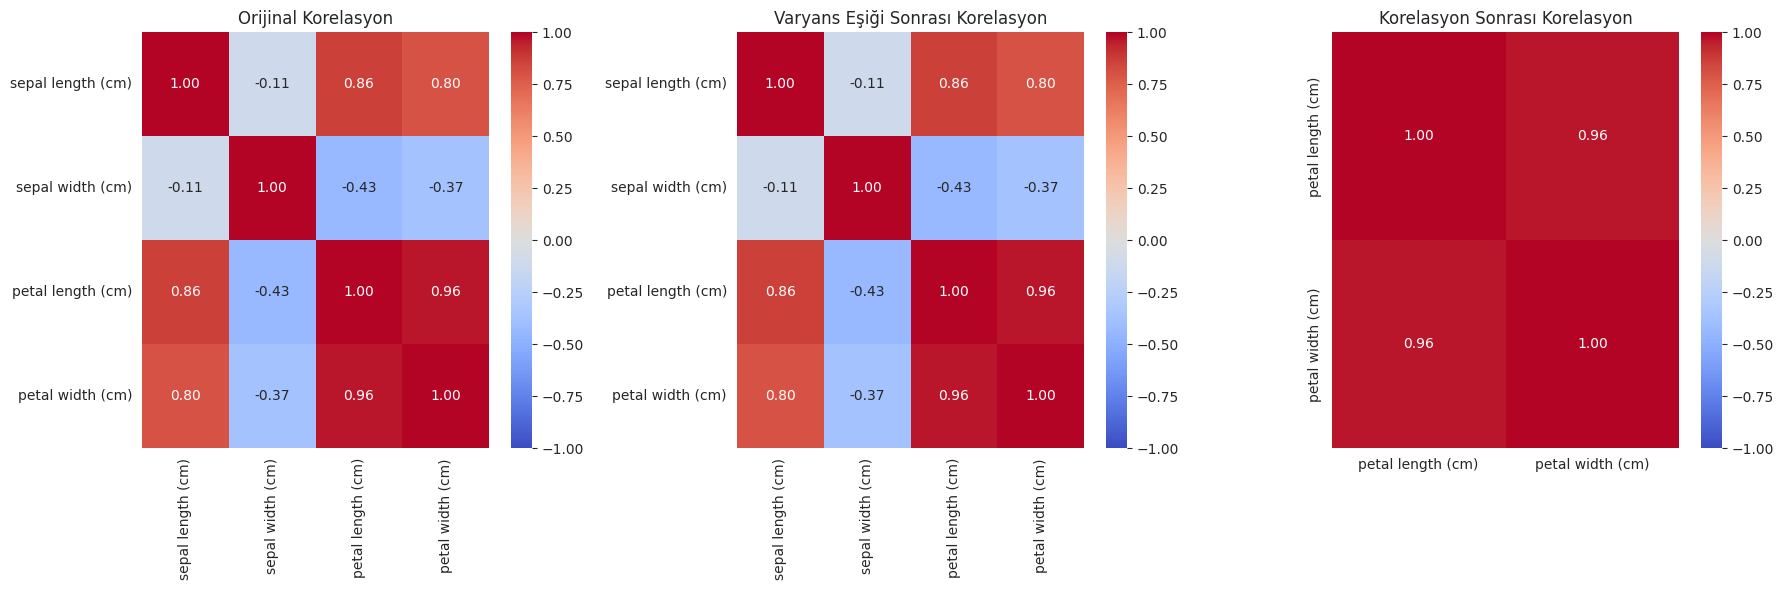

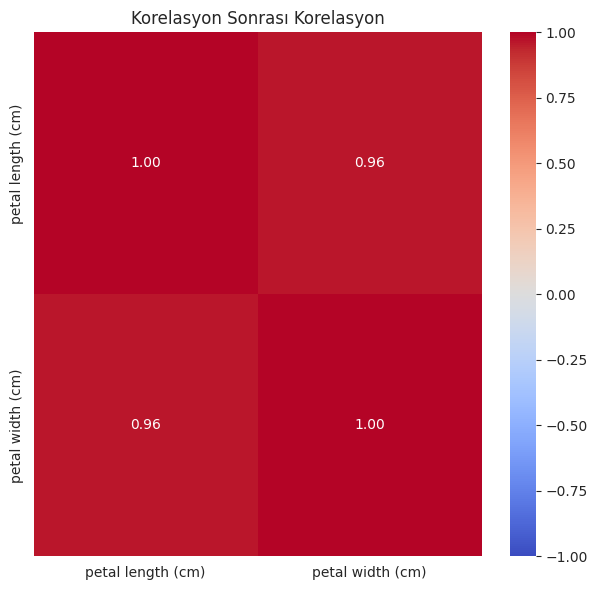

In [7]:
# Görselleştirmeler (Korelasyon dahil)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(np.corrcoef(X_eğitim.T), annot=True, fmt=".2f",
            xticklabels=özellik_isimleri, yticklabels=özellik_isimleri,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Orijinal Korelasyon")

plt.subplot(1, 3, 2)
sns.heatmap(np.corrcoef(X_eğitim_varyans.T), annot=True, fmt=".2f",
            xticklabels=secilen_varyans_isimler, yticklabels=secilen_varyans_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Varyans Eşiği Sonrası Korelasyon")

plt.subplot(1, 3, 3)
sns.heatmap(np.corrcoef(X_eğitim_kbest.T), annot=True, fmt=".2f",
            xticklabels=secilen_kbest_isimler, yticklabels=secilen_kbest_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasyon Sonrası Korelasyon")

plt.tight_layout()
plt.show()

# İkinci görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(np.corrcoef(X_eğitim_kbest.T), annot=True, fmt=".2f",
            xticklabels=secilen_kbest_isimler, yticklabels=secilen_kbest_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasyon Sonrası Korelasyon")

if X_eğitim_secici.shape[1] > 1:
    plt.subplot(1, 2, 2)
    sns.heatmap(np.corrcoef(X_eğitim_secici.T), annot=True, fmt=".2f",
                xticklabels=secilen_rf_isimler, yticklabels=secilen_rf_isimler,
                cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Random Forest Sonrası Korelasyon")

plt.tight_layout()
plt.show()

Örnek 2

In [10]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [11]:
# 1. Örnek Veri Kümesi Oluşturma
# 10 örnek (satır) ve 5 özellik (sütun)
X = np.array([[0, 2, 1, 3, 4],
              [0, 1, 4, 3, 2],
              [0, 0, 1, 2, 2],
              [0, 1, 3, 2, 1],
              [0, 2, 1, 3, 4],
              [1, 2, 1, 3, 4],
              [1, 1, 4, 3, 2],
              [1, 0, 1, 2, 2],
              [1, 1, 3, 2, 1],
              [1, 2, 1, 3, 4]])
y = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])  # Hedef değişken (sınıflandırma)


In [12]:
# 2. Varyans Eşiği
varyans_esigi = VarianceThreshold(threshold=0.8)  # Varyansı 0.8'den düşük olan sütunları kaldır
X_varyans = varyans_esigi.fit_transform(X)

print("Orijinal X:\n", X)
print("\nVaryans Eşiği Sonrası X:\n", X_varyans)
print("Varyans Eşiği ile seçilen sütunlar:", varyans_esigi.get_support(indices=True)) # Seçilen sütunların indeksleri

Orijinal X:
 [[0 2 1 3 4]
 [0 1 4 3 2]
 [0 0 1 2 2]
 [0 1 3 2 1]
 [0 2 1 3 4]
 [1 2 1 3 4]
 [1 1 4 3 2]
 [1 0 1 2 2]
 [1 1 3 2 1]
 [1 2 1 3 4]]

Varyans Eşiği Sonrası X:
 [[1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]
 [1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]]
Varyans Eşiği ile seçilen sütunlar: [2 4]


In [13]:
# 3. Korelasyon (SelectKBest)
# f_classif: Sınıflandırma görevleri için ANOVA F-değerini kullanır
# k=2: En iyi 2 özelliği seçer
k_best = SelectKBest(score_func=f_classif, k=2)
X_kbest = k_best.fit_transform(X_varyans, y)

print("\nSelectKBest Sonrası X:\n", X_kbest)
print("SelectKBest ile seçilen sütunlar:", k_best.get_support(indices=True))


SelectKBest Sonrası X:
 [[1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]
 [1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]]
SelectKBest ile seçilen sütunlar: [0 1]


In [14]:
# 4. Model Tabanlı Seçim (SelectFromModel)
rf = RandomForestClassifier(n_estimators=10)  # Küçük bir orman
sfm = SelectFromModel(rf, threshold="mean") # Ortalamadan daha önemli olanları seçer
X_sfm = sfm.fit_transform(X_kbest, y)
print("\nSelectFromModel Sonrası X:\n", X_sfm)
print("SelectFromModel ile seçilen sütunlar:", sfm.get_support(indices=True))


SelectFromModel Sonrası X:
 [[1]
 [4]
 [1]
 [3]
 [1]
 [1]
 [4]
 [1]
 [3]
 [1]]
SelectFromModel ile seçilen sütunlar: [0]
